In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

## Import Data and Gain General Insights

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is A09C-8A30

 Directory of C:\Users\Ahmed-Basem\Desktop\Current\Corelia\Task 5 - EDA

06/01/2023  02:50 PM    <DIR>          .
06/01/2023  02:50 PM    <DIR>          ..
06/01/2023  02:50 PM    <DIR>          .ipynb_checkpoints
06/01/2023  02:47 PM           210,076 ds_salaries.csv
06/01/2023  02:50 PM                72 Untitled.ipynb
               2 File(s)        210,148 bytes
               3 Dir(s)  20,670,435,328 bytes free


In [3]:
data = pd.read_csv('ds_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
print(f'There are {data.shape[0]} Rows , {data.shape[1]} Columns in the dataset')

There are 3755 Rows , 11 Columns in the dataset


In [5]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


### Preprocessing

In [158]:
def convert_rario(value):
    if value == 100:
        return "Fully Remote"
    if value == 50:
        return "Hybird"
    if value == 0:
        return "On Location"

In [159]:
data['remote_ratio'] = data['remote_ratio'].apply(convert_rario)

In [259]:
data['experience_level'] = data['experience_level'].replace('EN','Entry / Junior')
data['experience_level'] = data['experience_level'].replace('MI','Intermediate')
data['experience_level'] = data['experience_level'].replace('SE','Senior')
data['experience_level'] = data['experience_level'].replace('EX','Executive / Director')

In [282]:
data['company_size'] = data['company_size'].replace('L',"Large")
data['company_size'] = data['company_size'].replace('S',"Small")
data['company_size'] = data['company_size'].replace('M',"Medium")

In [308]:
data['employment_type'] = data['employment_type'].replace('FT',"Full-time")
data['employment_type'] = data['employment_type'].replace('PT',"Part-time")
data['employment_type'] = data['employment_type'].replace('CT',"Contract")
data['employment_type'] = data['employment_type'].replace('FL',"Freelance")

## EDA 

In [324]:
colors = ['r', 'g', 'y', 'm']

def count_plot(col):
    plt.figure(figsize=(8,4))
    sns.countplot(data=data,x=col)
    plt.show()
def multi_count_plot(col1,col2):
    plt.figure(figsize=(8,4))
    sns.countplot(data=data,x=col1,hue=col2)
    plt.show()
def pie_plot(col,limit=10,title=''):
    plt.figure(figsize=(10,6))
    plt.pie(x=data[col].value_counts()[:limit],labels=data[col].value_counts()[:limit].index,
           autopct='%1.1f%%')
    plt.title(title)
    plt.show()
def kde_plot(col):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=data[col],shade=True)
    plt.show()
def year_versus_col(col,title):
    fig,ax = plt.subplots(2,2,figsize=(15,15))
    for year in range(2020,2024):
        year_counts = data.loc[data.work_year == year][col].value_counts()[:8]
        plt.subplot(2,2,(year - 2020) + 1)
        plt.title("Year :" + str(year))
        plt.pie(year_counts.values,labels=year_counts.index,autopct='%1.1f%%',
        # Bring labels inside the pie
        labeldistance=0.7,explode=[0.05] * len(year_counts.values))
    fig.suptitle(title)
    plt.show()
def experience_versus_col(col,title):
    fig,ax = plt.subplots(2,2,figsize=(15,15))
    for idx,item in enumerate(data['experience_level'].unique()):
        item_counts = data.loc[data.experience_level == item][col].value_counts()[:8]
        plt.subplot(2,2,idx + 1)
        plt.title("Experience Level is  :" + str(item))
        plt.pie(item_counts.values,labels=item_counts.index,autopct='%1.1f%%',
        # Bring labels inside the pie
        labeldistance=0.7,explode=[0.05] * len(item_counts.values))
    fig.suptitle(title)
    plt.show()
    
    

### work_year

In [310]:
data['work_year'].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

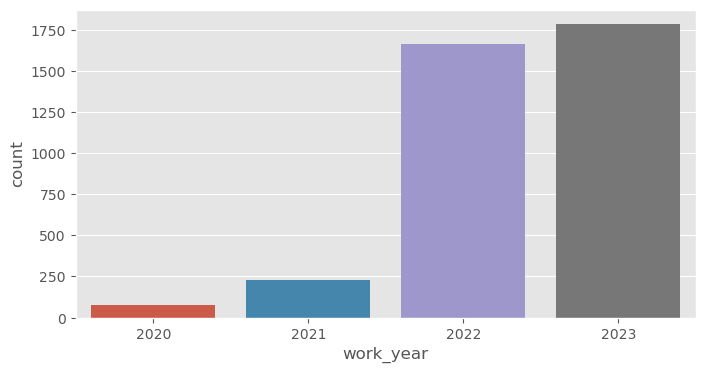

In [311]:
count_plot('work_year')

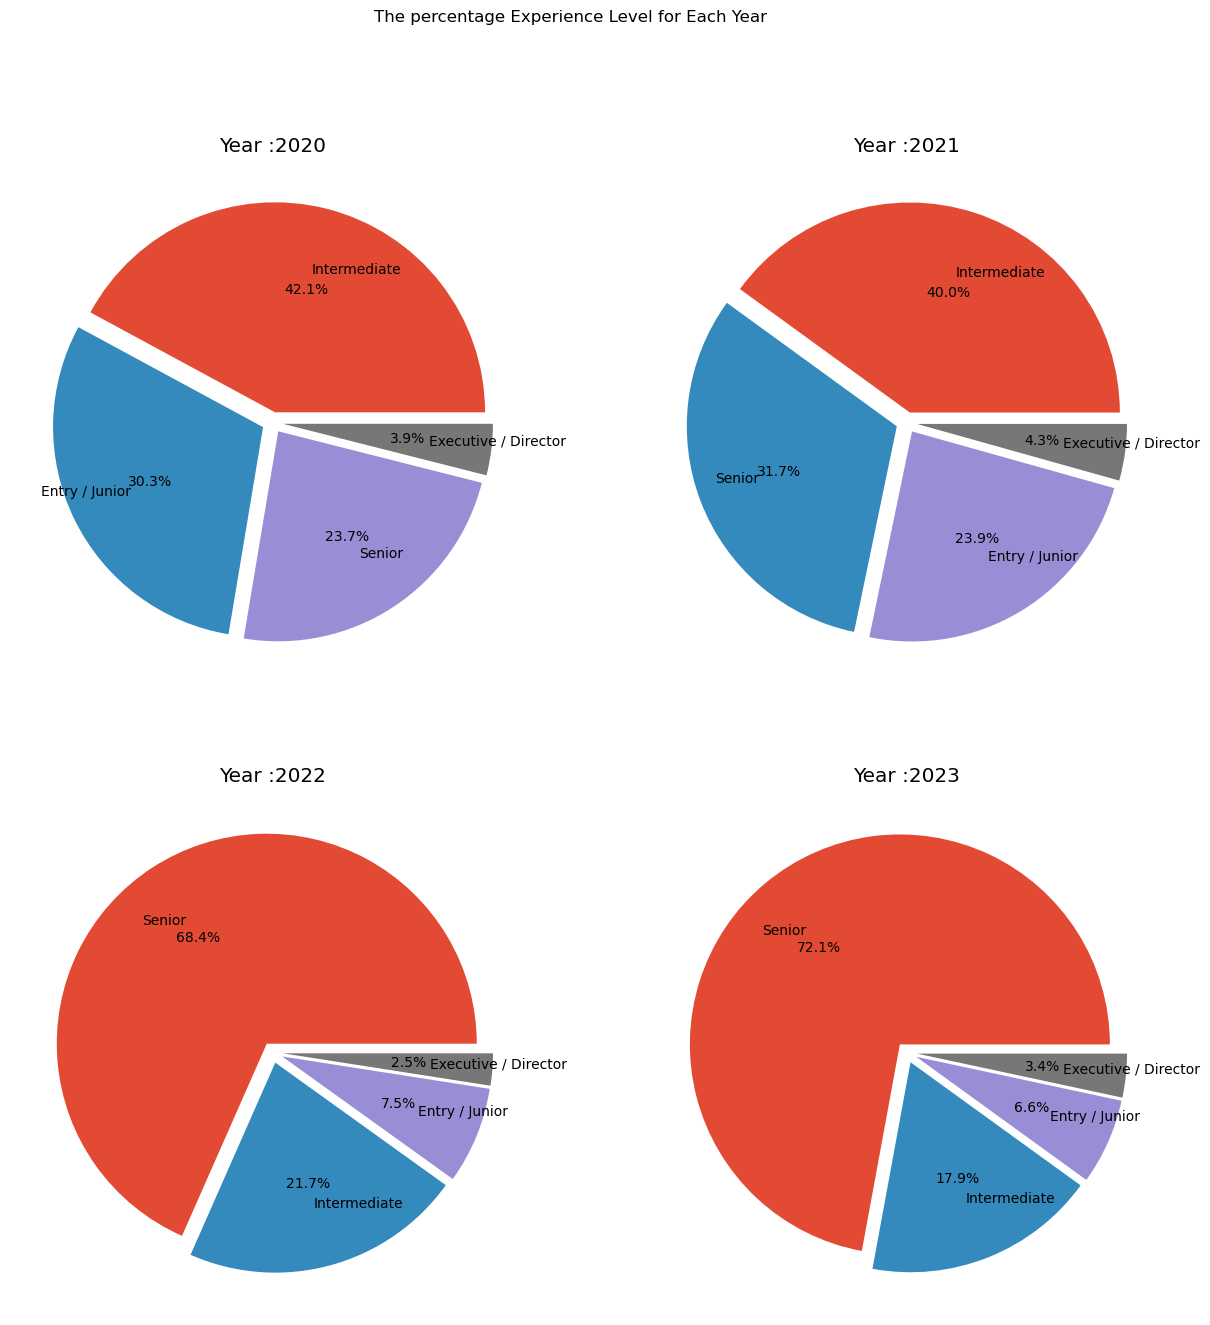

In [312]:
year_versus_col('experience_level','The percentage Experience Level for Each Year')

In [313]:
median_salay = data.groupby('work_year').median()['salary_in_usd']
median_salay

work_year
2020     73065.0
2021     80000.0
2022    131300.0
2023    143860.0
Name: salary_in_usd, dtype: float64

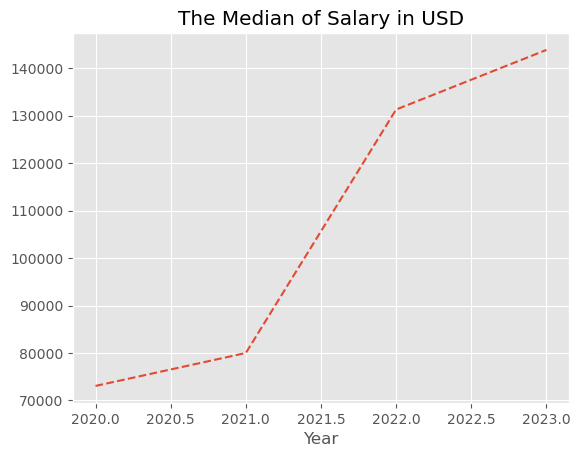

In [314]:
plt.plot(median_salay.index,median_salay.values,linestyle = 'dashed')
plt.xlabel('Year')
plt.title('The Median of Salary in USD')
plt.show()

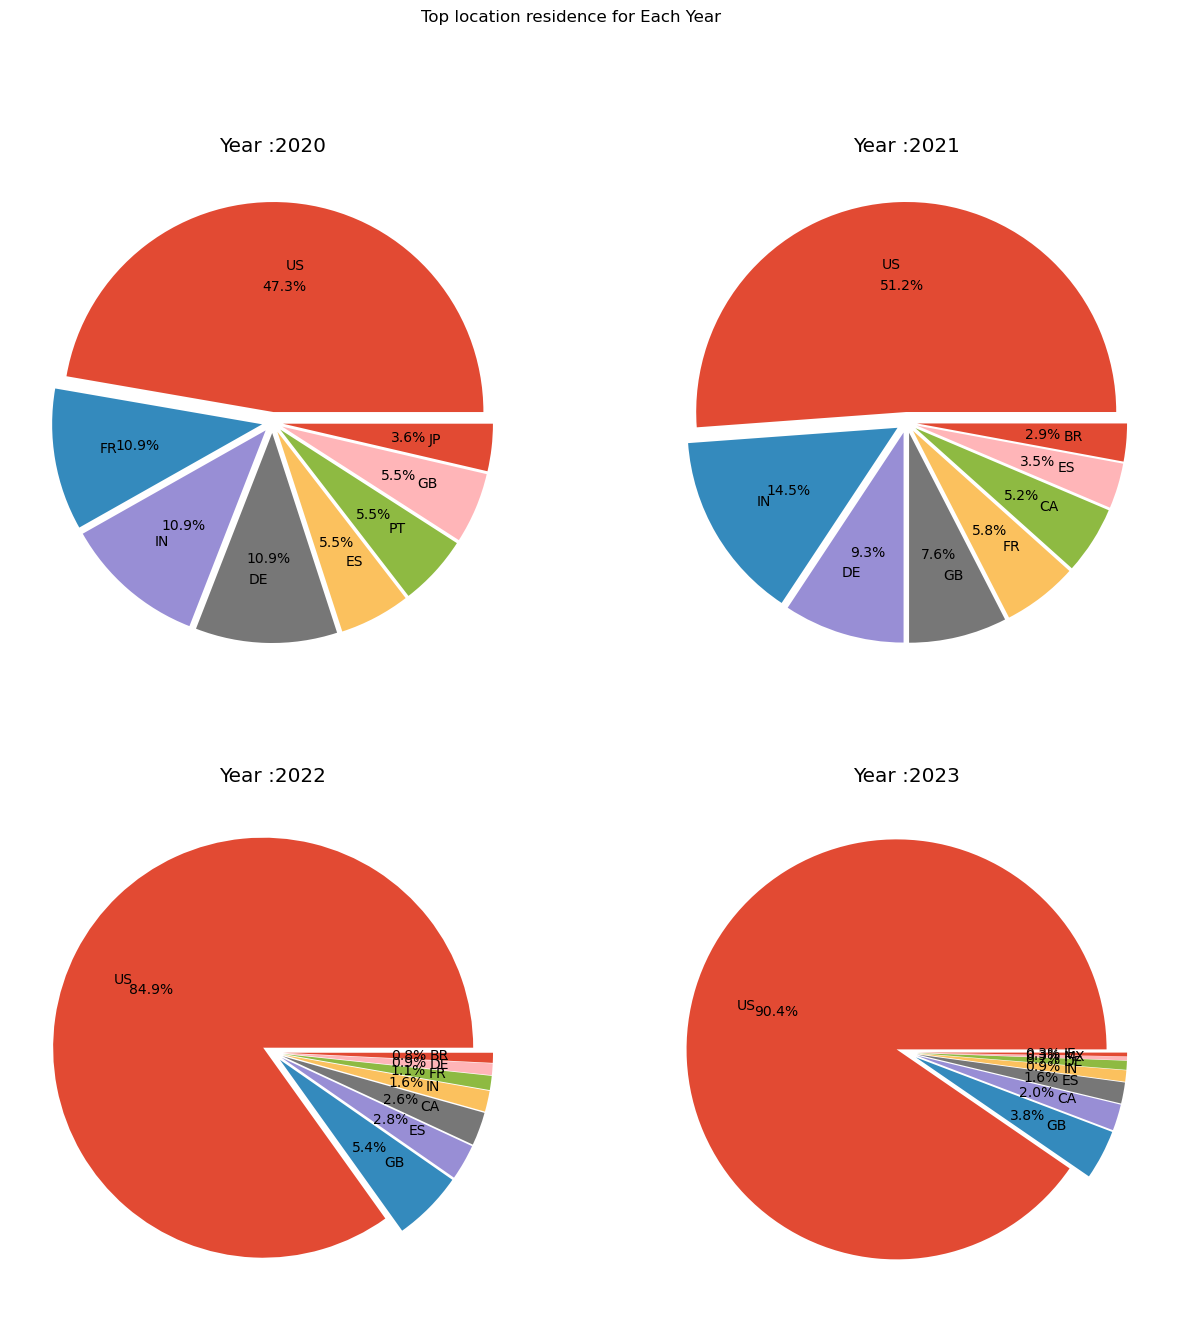

In [315]:
year_versus_col('employee_residence','Top location residence for Each Year')

In [316]:
on_location = []
hybird = []
remote = []
for year in range(2020,2024):
    hybird.append(data.loc[data.work_year == year]['remote_ratio'].value_counts()['Hybird'])
    on_location.append(data.loc[data.work_year == year]['remote_ratio'].value_counts()['On Location'])
    remote.append(data.loc[data.work_year == year]['remote_ratio'].value_counts()['Fully Remote'])

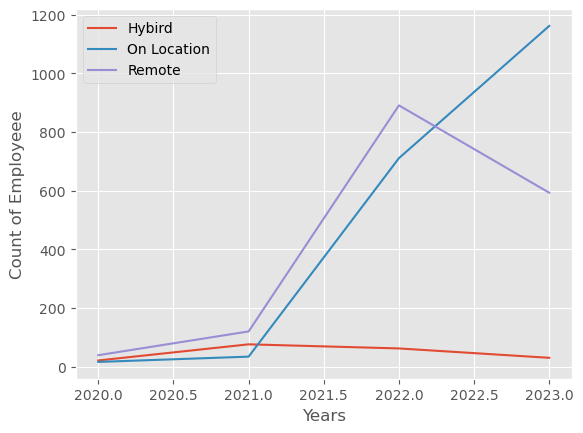

In [317]:
years = [2020,2021,2022,2023]
plt.plot(years,hybird)
plt.plot(years,on_location)
plt.plot(years,remote)
plt.legend(labels=['Hybird','On Location','Remote'])
plt.xlabel('Years')
plt.ylabel("Count of Employeee")
plt.show()

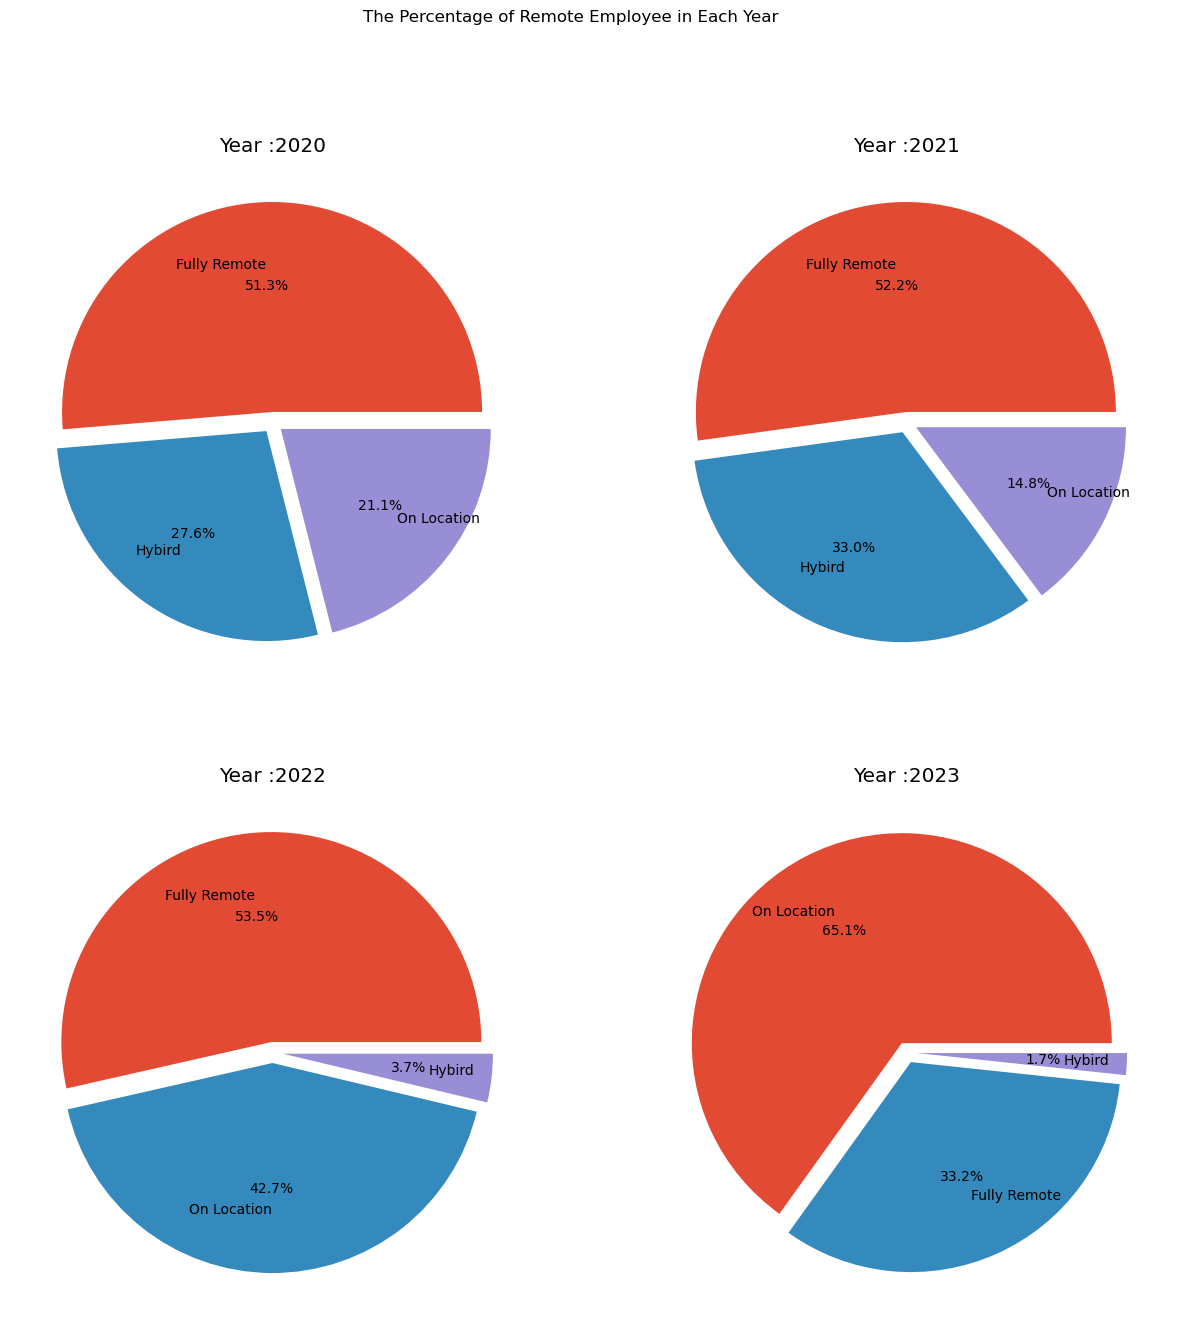

In [318]:
year_versus_col('remote_ratio','The Percentage of Remote Employee in Each Year')

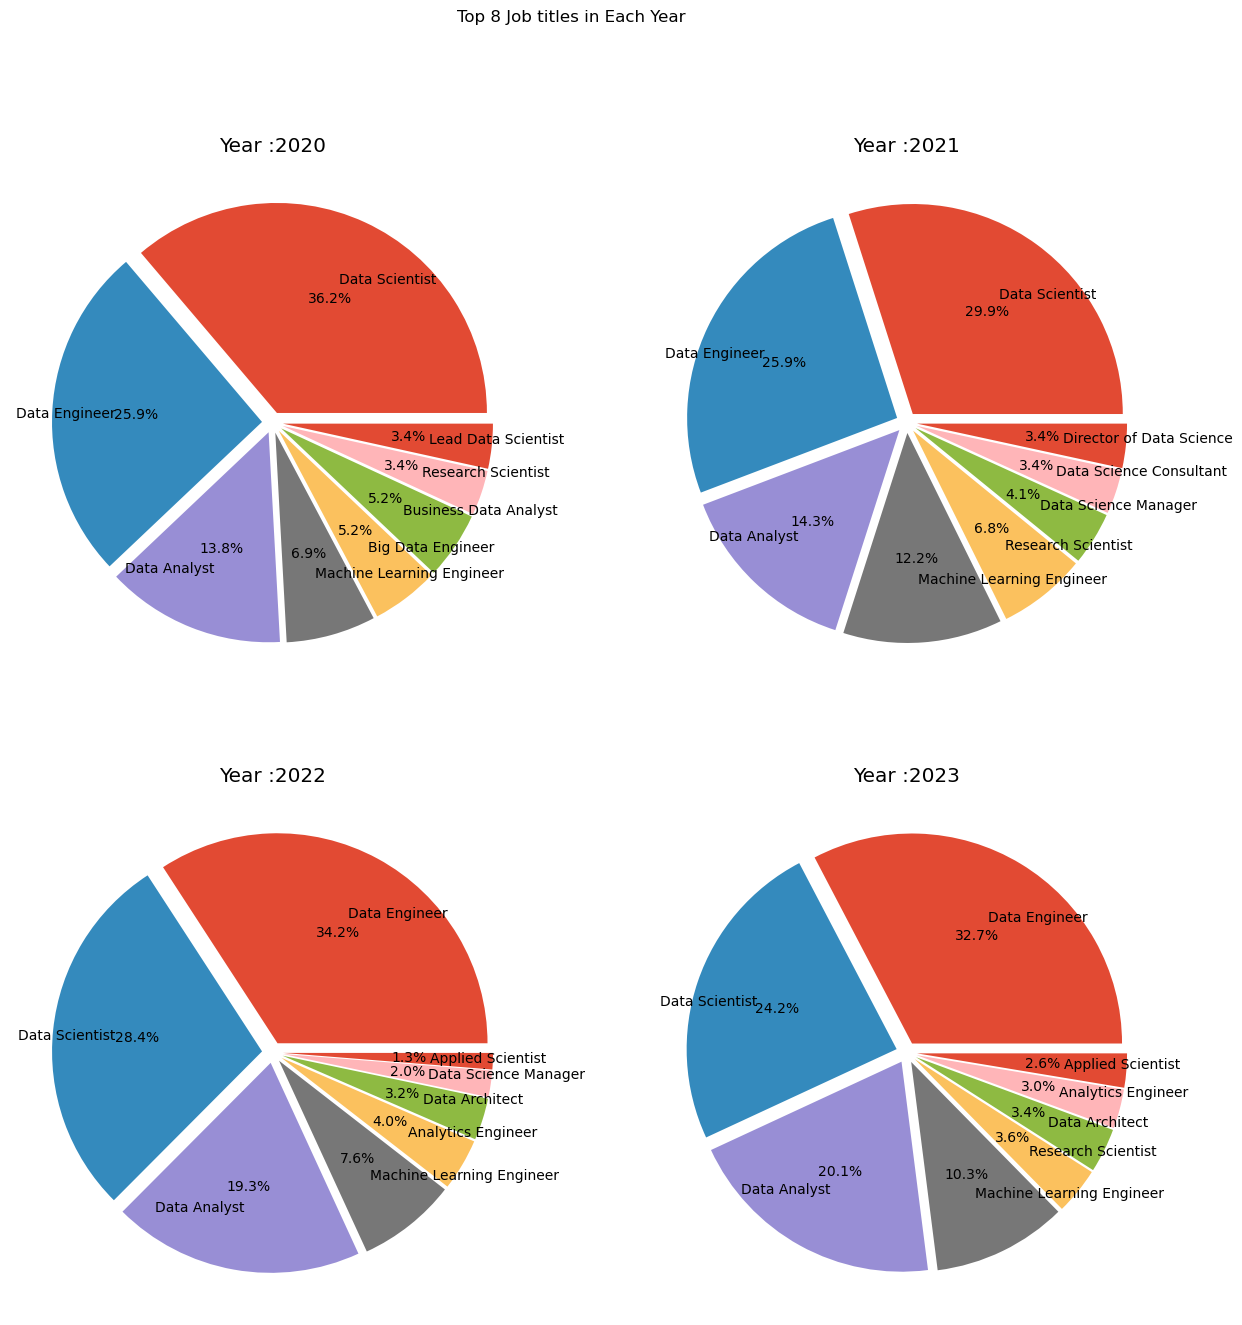

In [319]:
year_versus_col('job_title','Top 8 Job titles in Each Year')

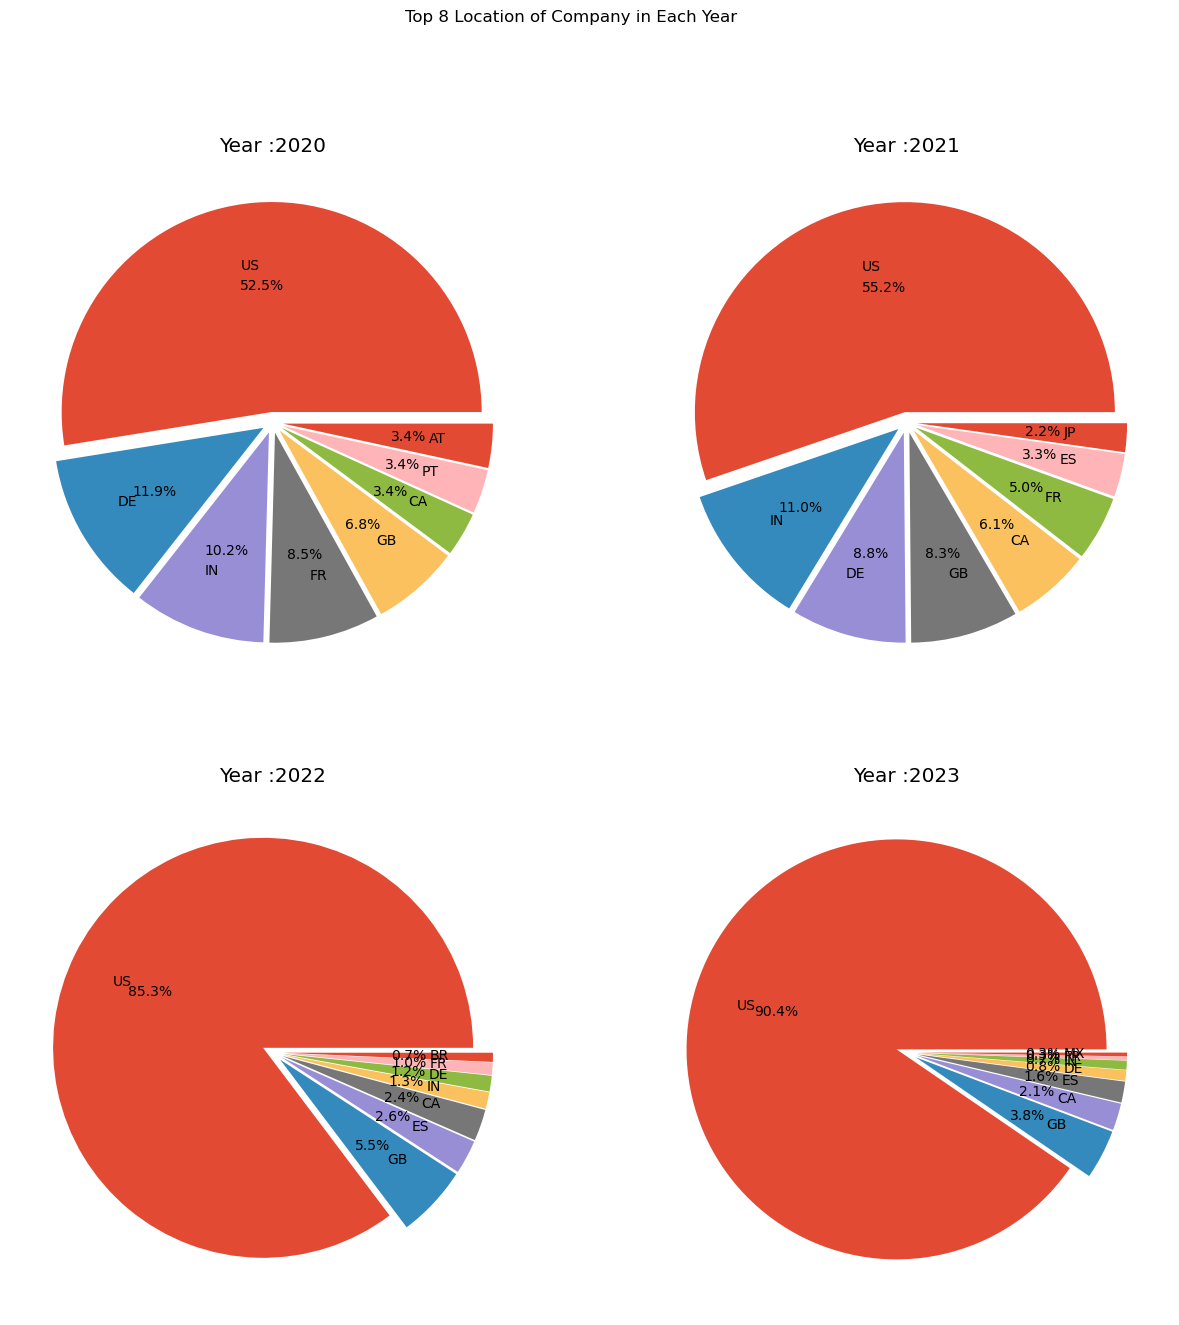

In [320]:
year_versus_col('company_location','Top 8 Location of Company in Each Year')

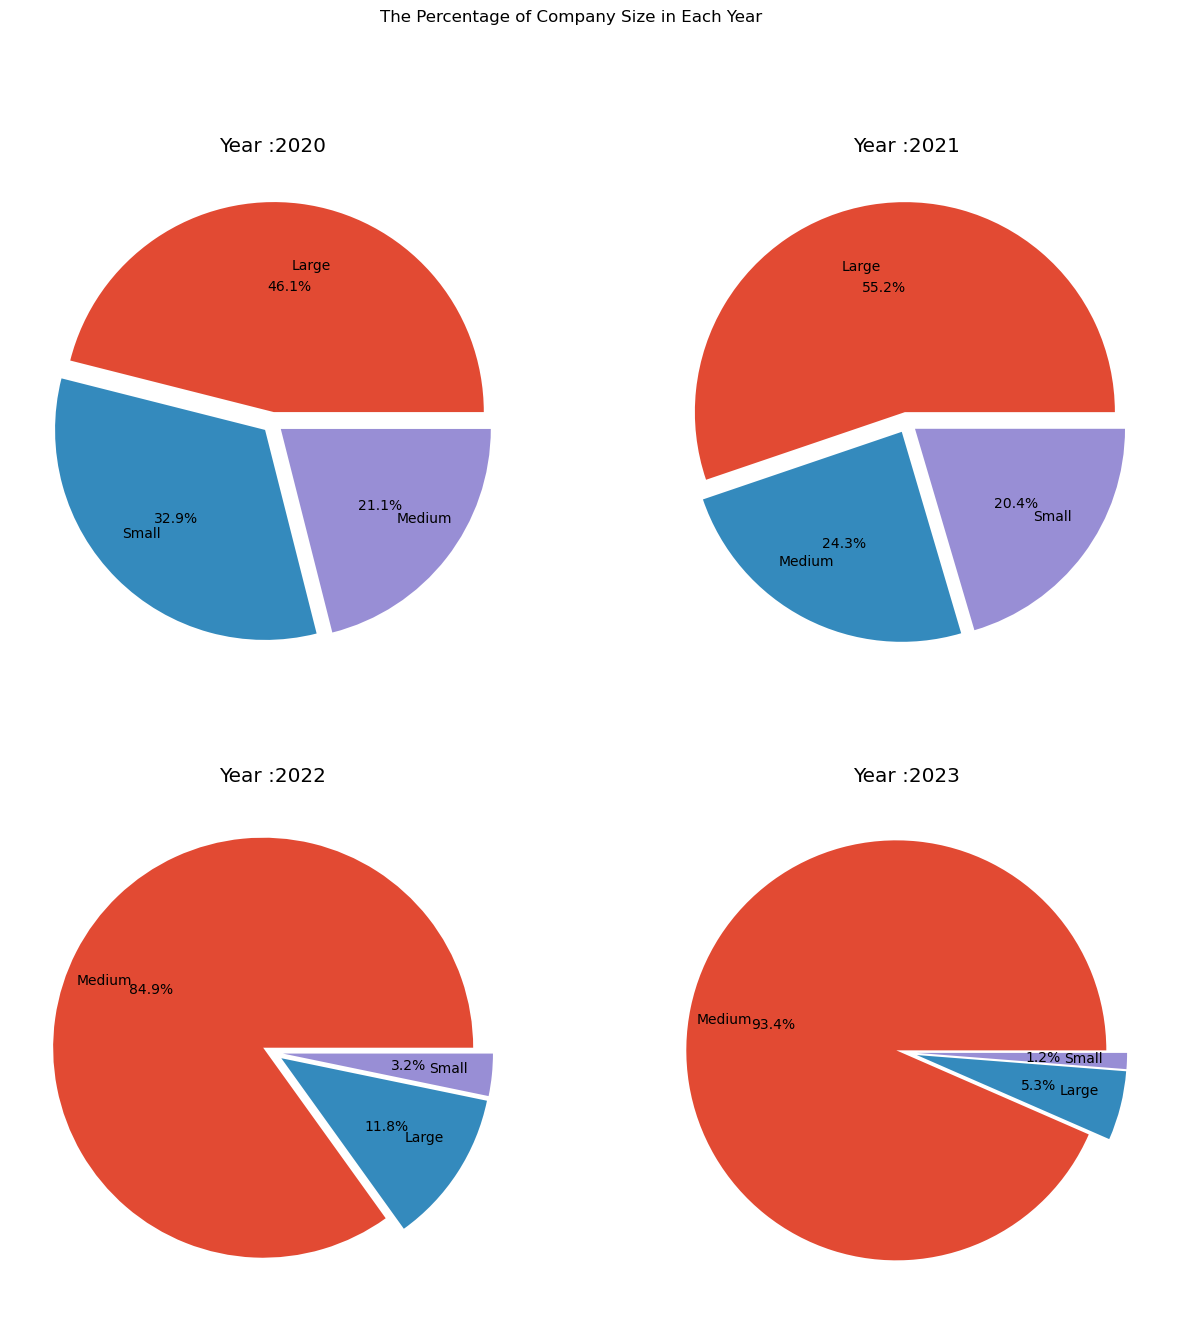

In [321]:
year_versus_col('company_size','The Percentage of Company Size in Each Year')

## experience_level

In [296]:
data['experience_level'].unique()

array(['Senior', 'Intermediate', 'Entry / Junior', 'Executive / Director'],
      dtype=object)

In [297]:
data['experience_level'].value_counts()

Senior                  2516
Intermediate             805
Entry / Junior           320
Executive / Director     114
Name: experience_level, dtype: int64

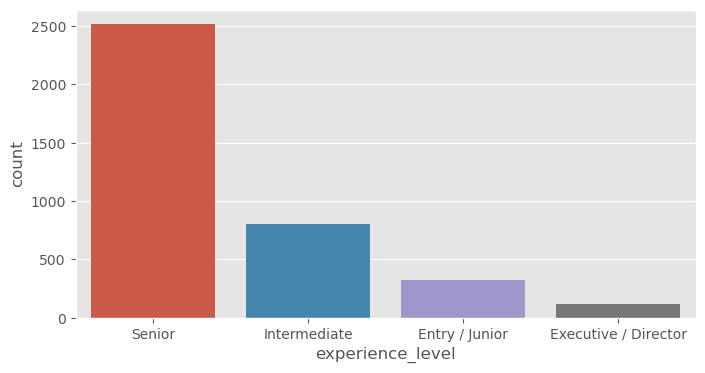

In [298]:
count_plot('experience_level')

In [299]:
median_salay = data.groupby('experience_level').median()['salary_in_usd']
median_salay

experience_level
Entry / Junior           70000.0
Executive / Director    196000.0
Intermediate            100000.0
Senior                  146000.0
Name: salary_in_usd, dtype: float64

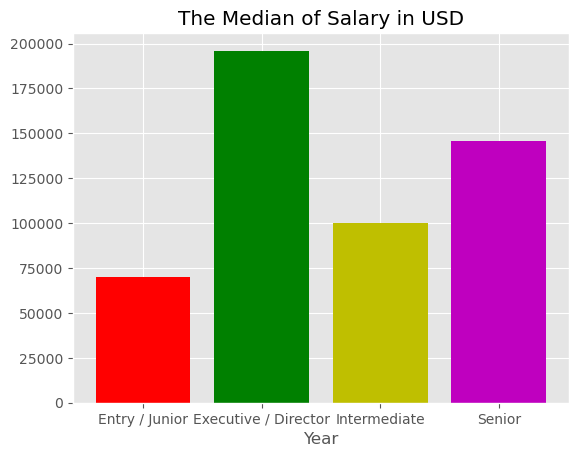

In [300]:
plt.bar(x=median_salay.index,height=median_salay.values,color=colors)
plt.xlabel('Year')
plt.title('The Median of Salary in USD')
plt.show()

In [301]:
# experience_versus_col('remote_ratio',"Working Type for each Experience Level")

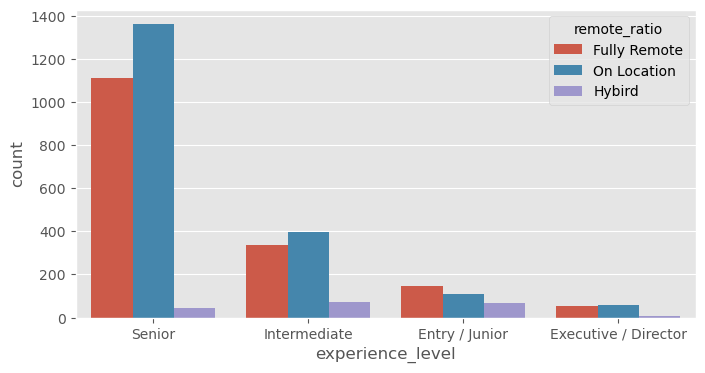

In [302]:
multi_count_plot('experience_level','remote_ratio')

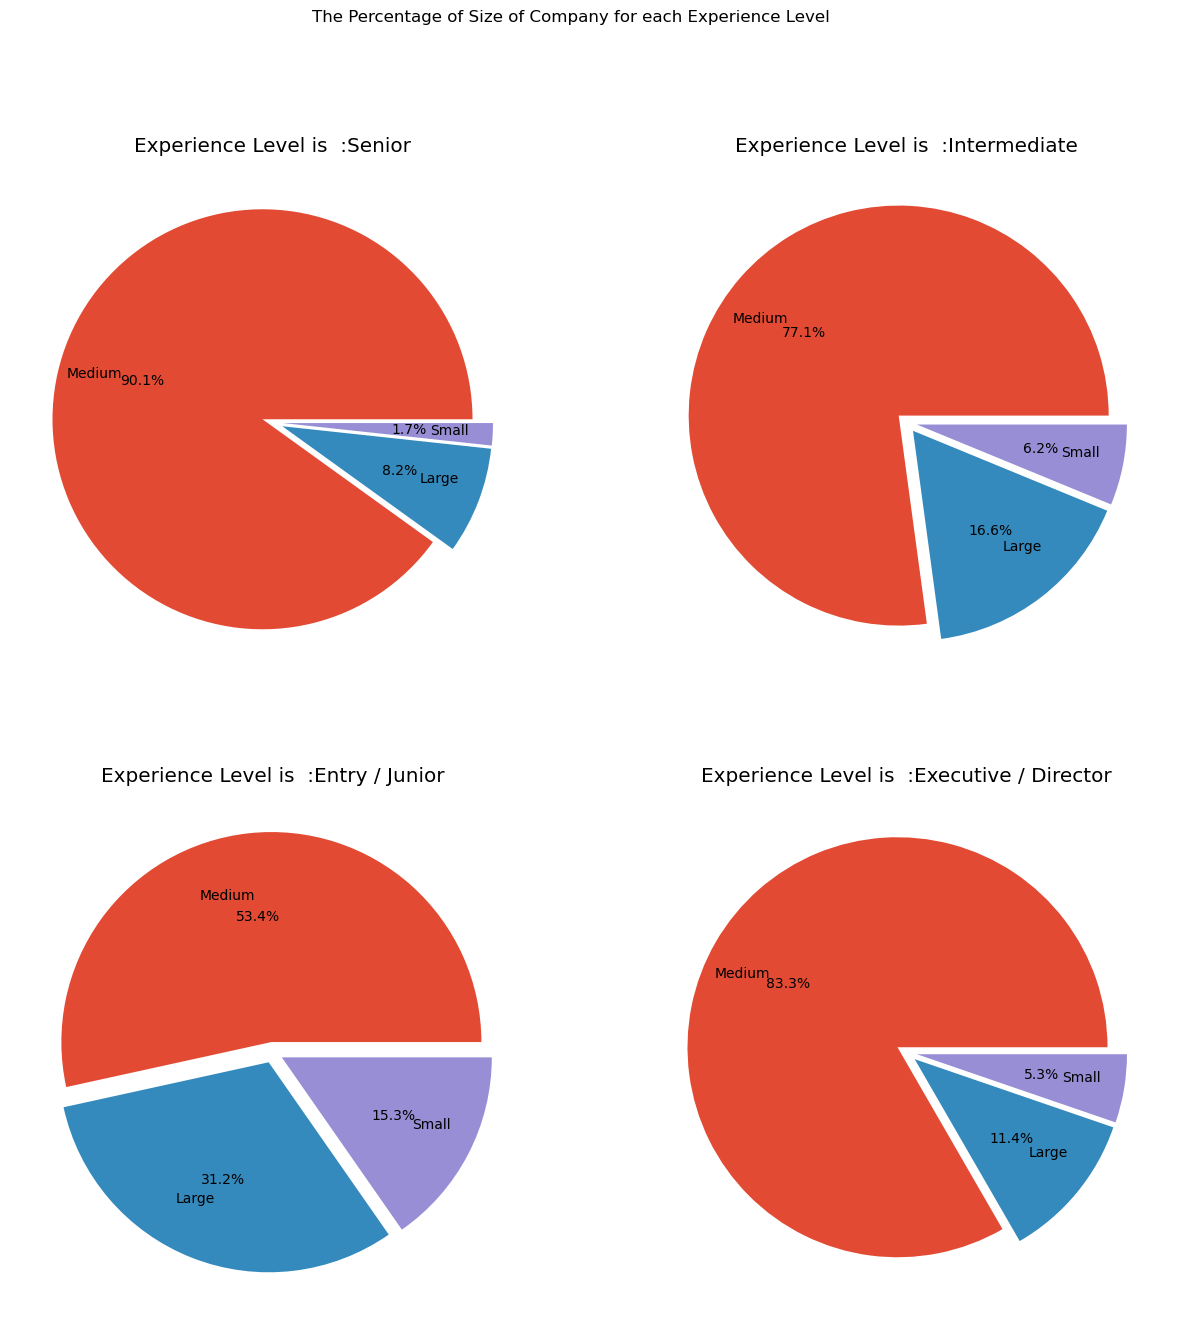

In [303]:
experience_versus_col('company_size',"The Percentage of Size of Company for each Experience Level")

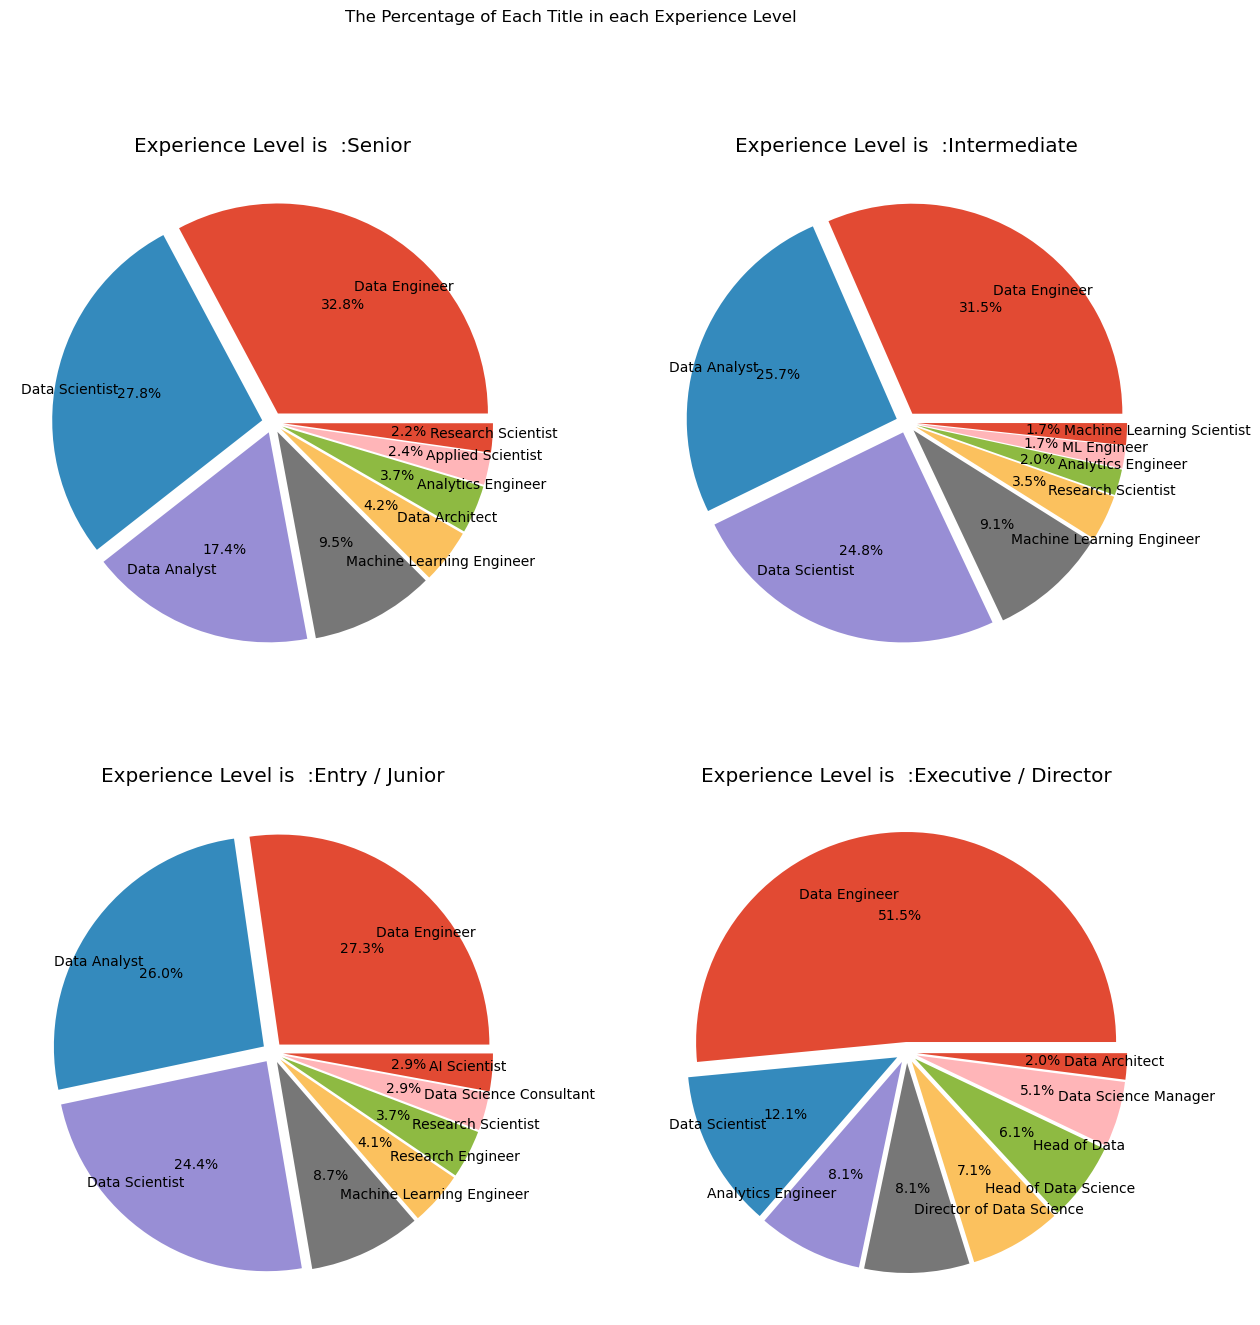

In [304]:
experience_versus_col('job_title',"The Percentage of Each Title in each Experience Level")

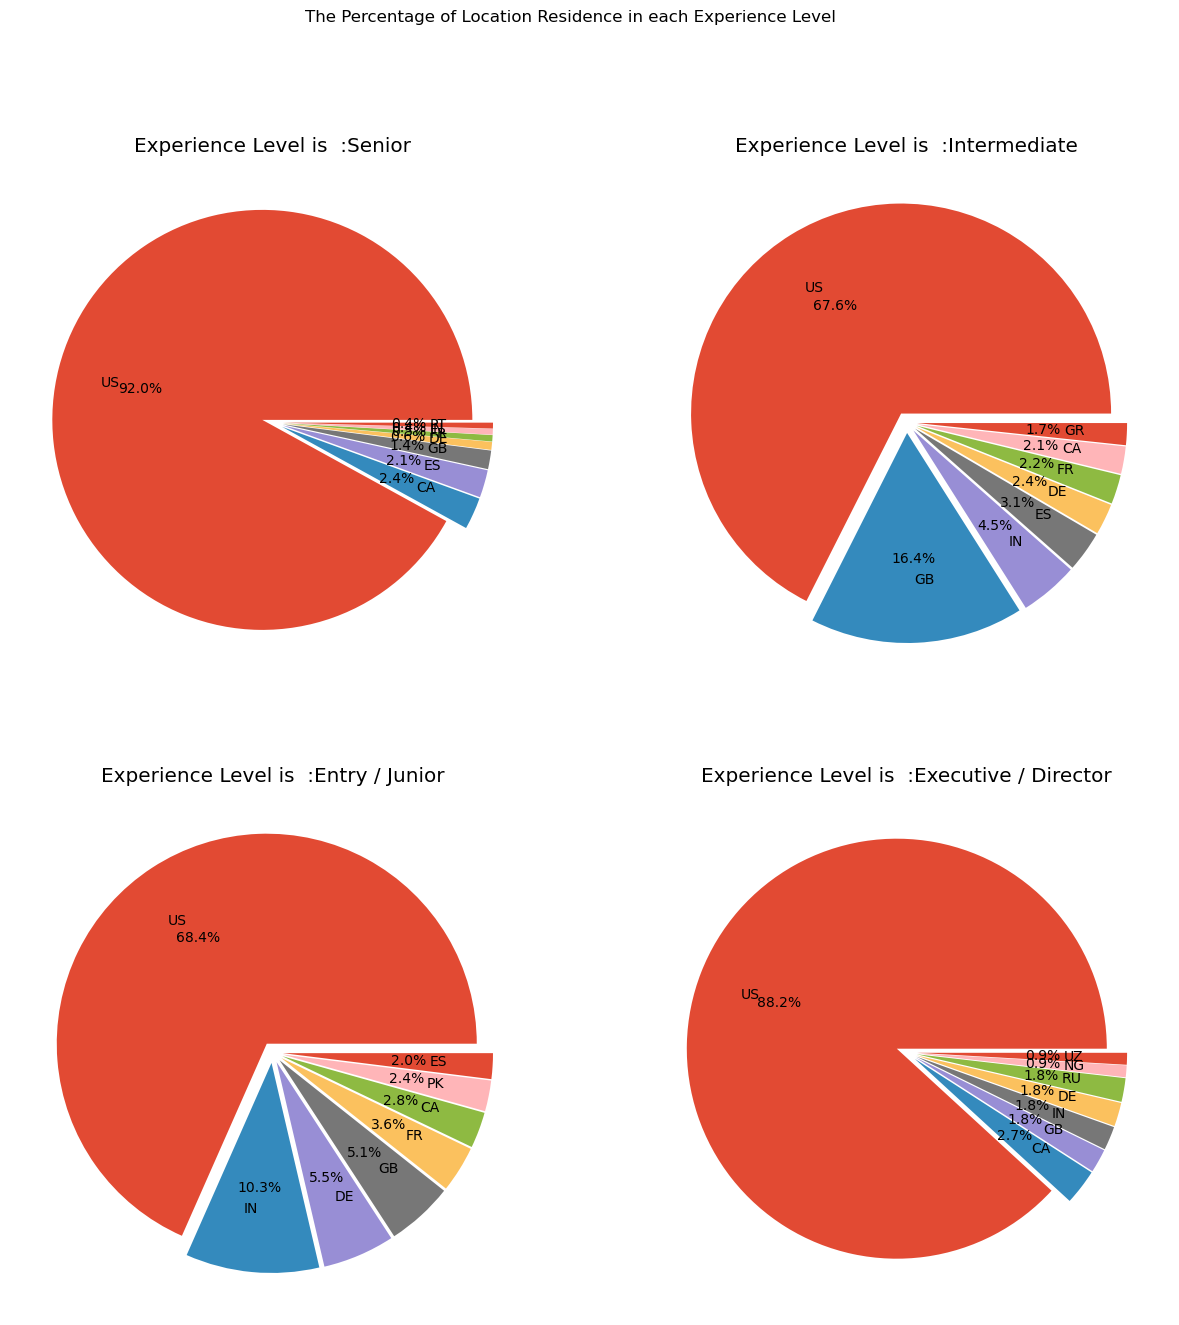

In [305]:
experience_versus_col('employee_residence',"The Percentage of Location Residence in each Experience Level")

### employment_type

In [328]:
data['employment_type'].value_counts()

Full-time    3718
Part-time      17
Contract       10
Freelance      10
Name: employment_type, dtype: int64

In [330]:
print("The Percentage of Each Employment Type")
data['employment_type'].value_counts() / data.shape[0]

The Percentage of Each Employment Type


Full-time    0.990146
Part-time    0.004527
Contract     0.002663
Freelance    0.002663
Name: employment_type, dtype: float64

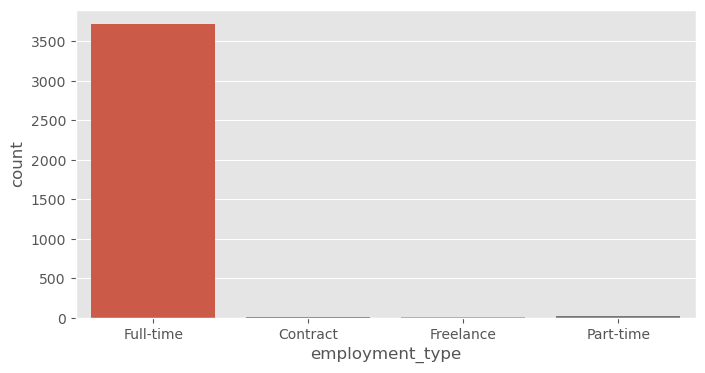

In [327]:
count_plot('employment_type')

###  job_title

In [340]:
print(f"Number of Jobs Available in our data is {data['job_title'].nunique()}")

Number of Jobs Available in our data is 93


In [341]:
data['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

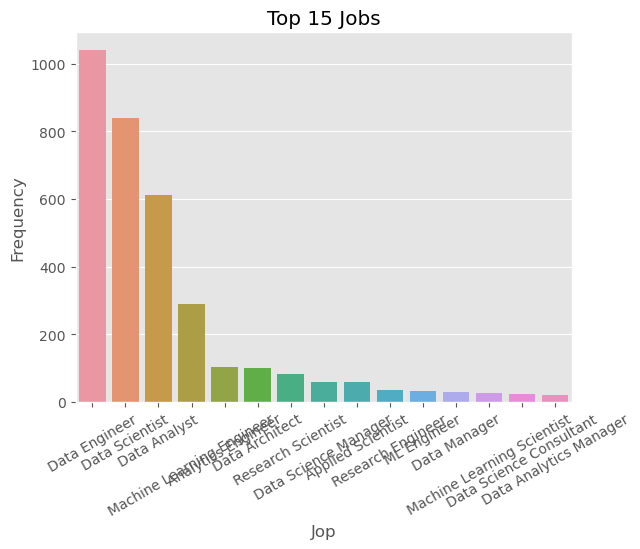

In [339]:
number = 15
top_jobs = data['job_title'].value_counts().nlargest(number)
sns.barplot(x=top_jobs.index, y=top_jobs.values)
plt.title(f'Top {number} Jobs')
plt.xlabel('Jop')
plt.xticks(rotation=30)
plt.ylabel('Frequency')
plt.show()


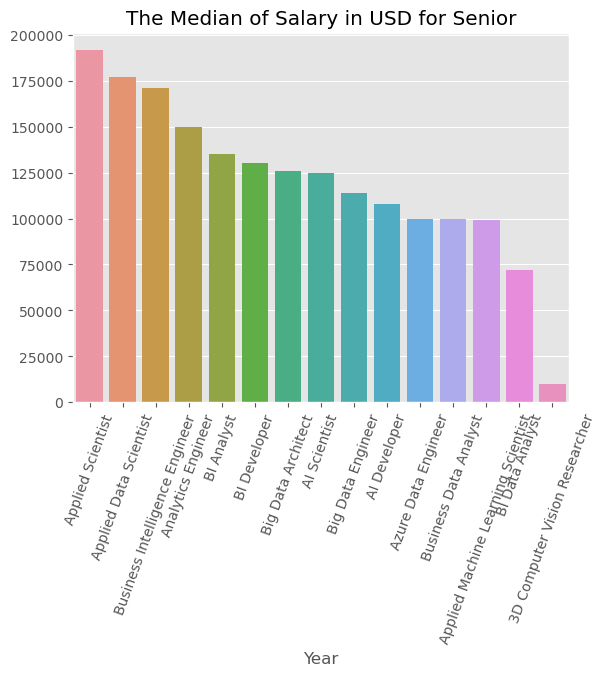

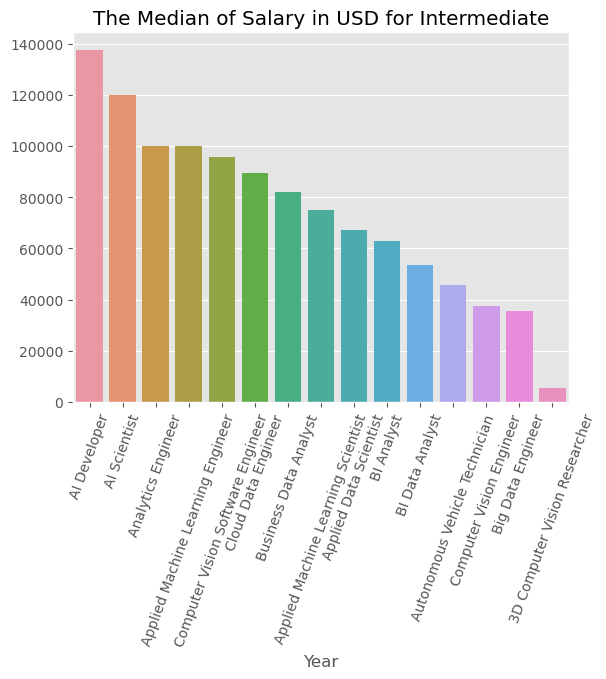

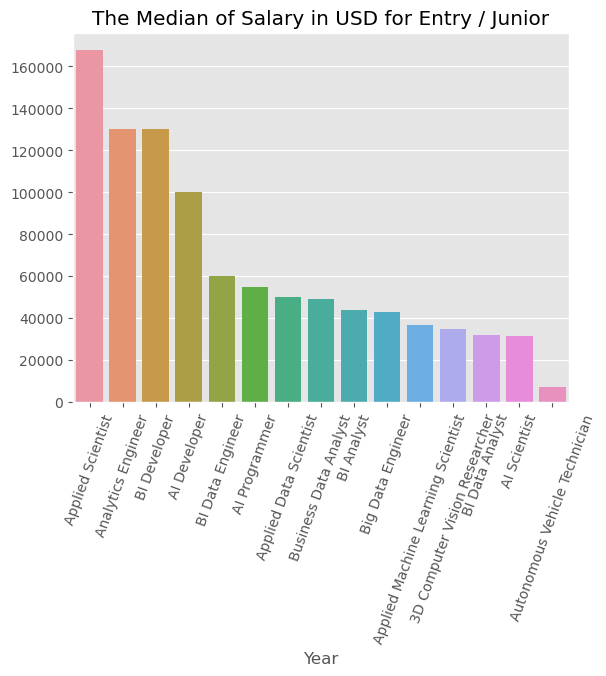

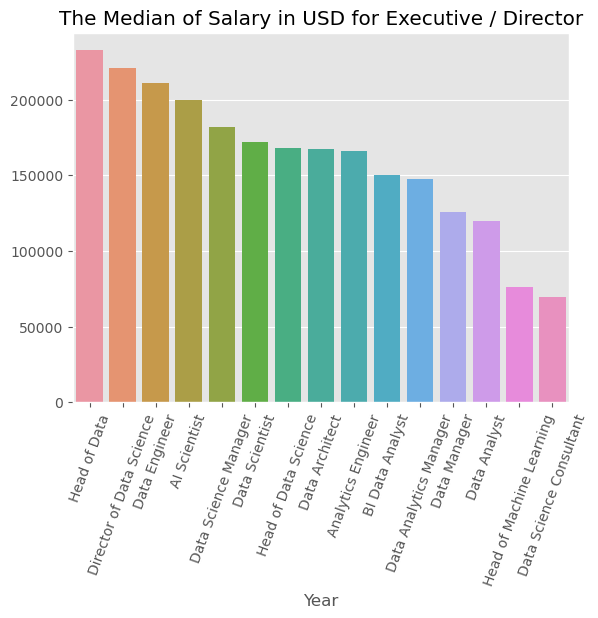

In [360]:
for level in data['experience_level'].unique():
    median_salay = data.loc[data.experience_level == level ].groupby('job_title').median()['salary_in_usd'][:15]
    median_salay= median_salay.sort_values(ascending=False)
    sns.barplot(x=median_salay.index,y=median_salay.values)
    plt.xlabel('Year')
    plt.title(f'The Median of Salary in USD for {level}')
    plt.xticks(rotation=70)
    plt.show()  

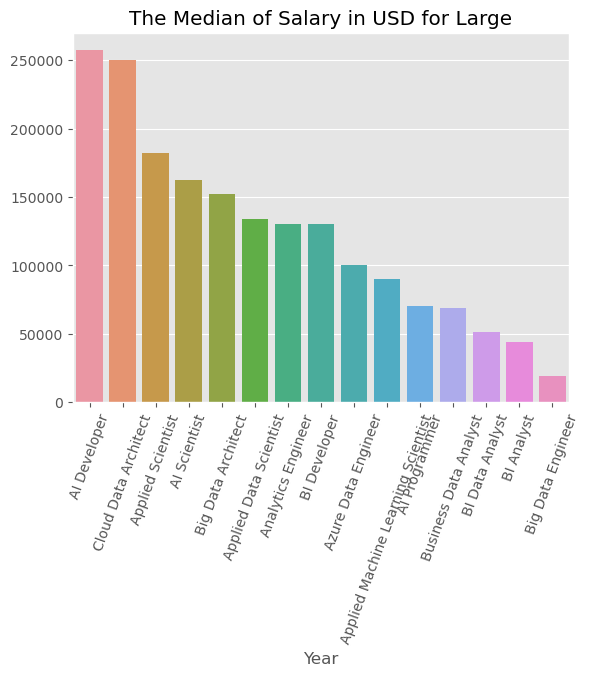

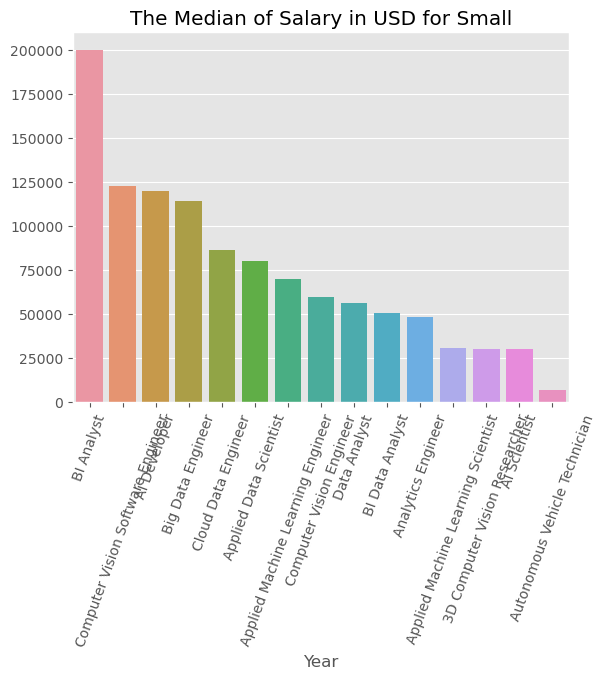

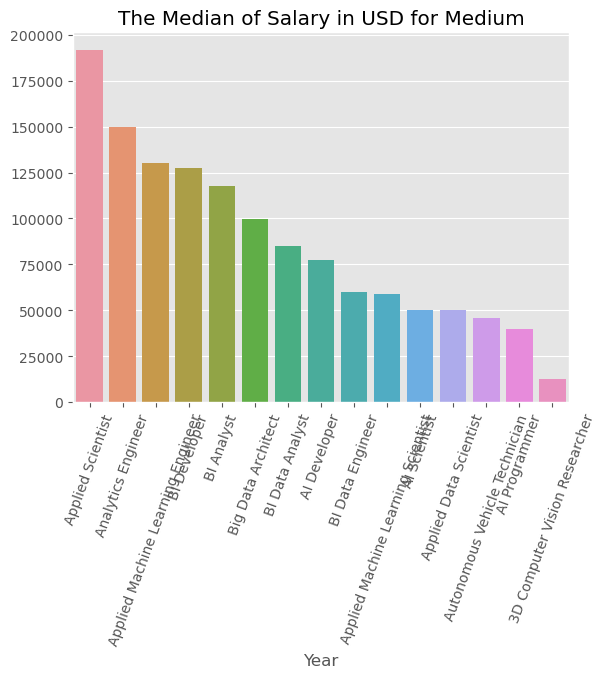

In [363]:
for level in data['company_size'].unique():
    median_salay = data.loc[data.company_size == level ].groupby('job_title').median()['salary_in_usd'][:15]
    median_salay= median_salay.sort_values(ascending=False)
    sns.barplot(x=median_salay.index,y=median_salay.values)
    plt.xlabel('Year')
    plt.title(f'The Median of Salary in USD for {level}')
    plt.xticks(rotation=70)
    plt.show()  

### salary

In [385]:
data['salary_in_usd'].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [386]:
data['salary_in_usd'] = data['salary_in_usd'] / 1000

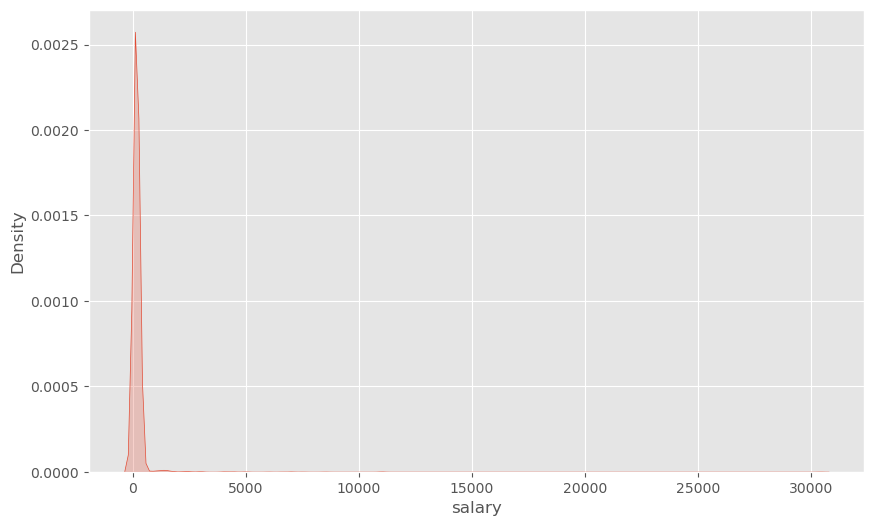

In [373]:
kde_plot('salary_in_usd')

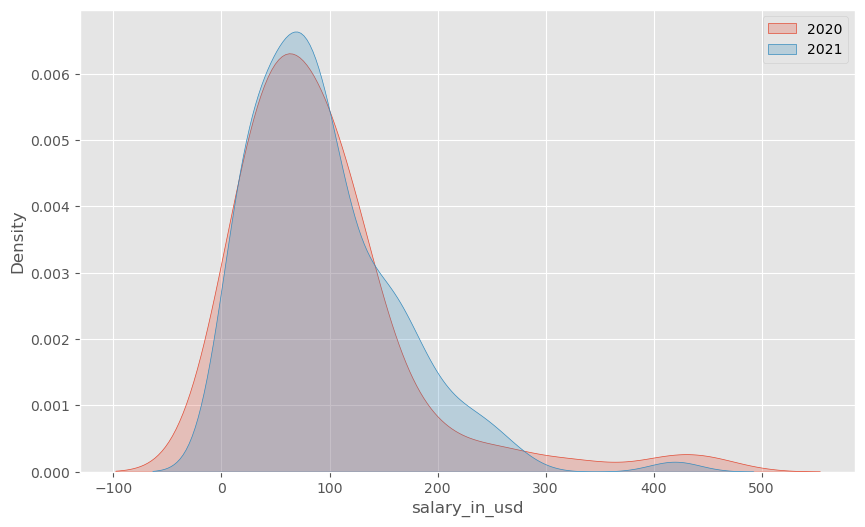

In [387]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data.loc[data.work_year == 2020]['salary_in_usd'],shade=True)
sns.kdeplot(data=data.loc[data.work_year == 2021]['salary_in_usd'],shade=True)
# sns.kdeplot(data=data.loc[data.work_year == 2022]['salary'],shade=True)
# sns.kdeplot(data=data.loc[data.work_year == 2023]['salary'],shade=True)
plt.legend(labels=[2020,2021,2022,2023])
plt.show()

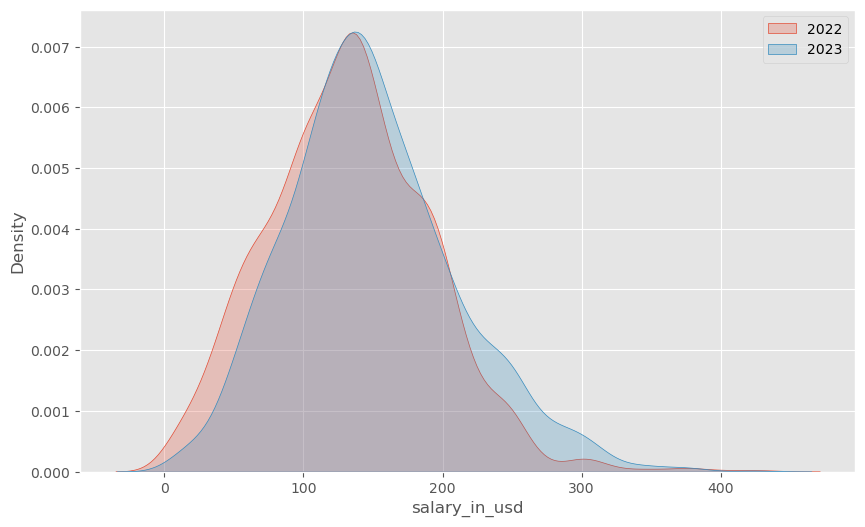

In [388]:
plt.figure(figsize=(10,6))
# sns.kdeplot(data=data.loc[data.work_year == 2020]['salary'],shade=True)
# sns.kdeplot(data=data.loc[data.work_year == 2021]['salary'],shade=True)
sns.kdeplot(data=data.loc[data.work_year == 2022]['salary_in_usd'],shade=True)
sns.kdeplot(data=data.loc[data.work_year == 2023]['salary_in_usd'],shade=True)
plt.legend(labels=[2022,2023])
plt.show()

#### OurLier Detection

In [389]:
Q1 = data['salary_in_usd'].quantile(0.25)
Q3 = data['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

upper_band = Q3 + IQR * 1.5
lower_band = Q1 - IQR * 1.5
upper_band , lower_band

(295.0, -25.0)

In [393]:
data[data['salary_in_usd'] > 300]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2023,Senior,Full-time,Computer Vision Engineer,342.81,USD,342.810,US,On Location,US,Medium
68,2023,Senior,Full-time,Applied Scientist,309.40,USD,309.400,US,On Location,US,Large
133,2023,Senior,Full-time,Machine Learning Engineer,342.30,USD,342.300,US,On Location,US,Large
145,2023,Senior,Full-time,Machine Learning Engineer,318.30,USD,318.300,US,Fully Remote,US,Medium
163,2023,Senior,Full-time,Applied Scientist,309.40,USD,309.400,US,On Location,US,Large
228,2023,Executive / Director,Full-time,Head of Data,329.50,USD,329.500,US,On Location,US,Medium
358,2023,Senior,Full-time,Machine Learning Engineer,304.00,USD,304.000,US,Fully Remote,US,Medium
478,2023,Executive / Director,Full-time,Director of Data Science,353.20,USD,353.200,US,On Location,US,Medium
488,2023,Senior,Full-time,Data Scientist,317.07,USD,317.070,US,On Location,US,Medium
528,2023,Senior,Full-time,AI Scientist,1500.00,ILS,423.834,IL,On Location,IL,Large


In [392]:
data[data['salary_in_usd'] > 300]['experience_level'].value_counts()

Senior                  26
Executive / Director    12
Intermediate             4
Name: experience_level, dtype: int64

In [394]:
data[data['salary_in_usd'] > 300]['company_size'].value_counts()

Medium    30
Large     11
Small      1
Name: company_size, dtype: int64

In [396]:
data[data['salary_in_usd'] > 300]['employment_type'].value_counts()

Full-time    41
Contract      1
Name: employment_type, dtype: int64

In [398]:
data[data['salary_in_usd'] > 300]['employee_residence'].value_counts()

US    40
IL     1
GB     1
Name: employee_residence, dtype: int64